# **Demonstration: Running a trained bianry classificaiton model on a dataset**
# Import libraries

In [1]:
from pathlib import Path
from json import load
from CO_BC import CO_BC

# Import default configurations
model_config.json has default hyperparameters for models: 
* the number of input features
* the nubmer of hidden neurons for each layer
* the nubmer of hidden layers
* the nubmer of training epochs
* learning rate
* batch size

In [2]:
PACKAGE_PATH = Path.cwd()
with open(PACKAGE_PATH / "model_config.json", "r") as f:
    json_dict = load(f)
    CO_BC_config = json_dict["model"]["CO_BC"]
CO_BC_config

{'num_input_features': 0,
 'num_hidden_neurons': [128, 256, 8],
 'num_hidden_layers': 3,
 'num_epochs': 300,
 'learning_rate': 0.001,
 'size_batch': 32}

# Set the model name
Variable `model_name` will be used to find a saved model in the directory `PZ_CO_ID/CO_BC/trained_model/CO_BC` and load it.

The paths for input CSV files to load redshift probability distribution and photometric redshift are specified in the next two lines for each model, 8 of which are discussed in the paper. You can copy and paste the paths in `CO_BC_config.update()` in the next cell.

In [3]:
# model_name = "model_CO_BC_hsc_MC_LR"
    # "input_csv_path_PDF": PACKAGE_PATH / 'data/hsc_PDF11.csv',
    # "input_csv_path_photz": PACKAGE_PATH / 'data/hsc_EPDF_all_LR.csv',

# model_name = "model_CO_BC_hsc_MC_SPIDERz"
    # "input_csv_path_PDF": PACKAGE_PATH / 'data/hsc_EPDF_all_with_PDF_11.csv',
    # "input_csv_path_photz": PACKAGE_PATH / 'data/hsc_EPDF_all.csv',

# model_name = "model_CO_BC_hsc_SPIDERz_LR"
    # "input_csv_path_PDF": PACKAGE_PATH / 'data/hsc_EPDF.csv',
    # "input_csv_path_photz": PACKAGE_PATH / 'data/hsc_EPDF_LR.csv',

model_name = "model_CO_BC_hsc_SPIDERz_SPIDERz"
    # "input_csv_path_PDF": PACKAGE_PATH / 'data/hsc_EPDF.csv',
    # "input_csv_path_photz": PACKAGE_PATH / 'data/hsc_EPDF.csv',

# model_name = "model_CO_BC_relz_SPIDERz_LR"
    # "input_csv_path_PDF": PACKAGE_PATH / 'data/relz_EPDF_all.csv',
    # "input_csv_path_photz": PACKAGE_PATH / 'data/relz_EPDF_all_LR.csv',

# model_name = "model_CO_BC_relz_SPIDERz_SPIDERz"
    # "input_csv_path_PDF": PACKAGE_PATH / 'data/relz_EPDF_all.csv',
    # "input_csv_path_photz": PACKAGE_PATH / 'data/relz_EPDF_all.csv',

# model_name = "model_CO_BC_relz_MC_LR"
    # "input_csv_path_PDF": PACKAGE_PATH / 'data/relz_PDF11.csv',
    # "input_csv_path_photz": PACKAGE_PATH / 'data/relz_LR.csv',

# model_name = "model_CO_BC_relz_MC_SPIDERz"
    # "input_csv_path_PDF": PACKAGE_PATH / 'data/relz_EPDF_all_with_PDF_11.csv',
    # "input_csv_path_photz": PACKAGE_PATH / 'data/relz_EPDF_all.csv',


# Update the config

Input/output paths and training-specific hyperparameters should be updated before traning

* Input paths
    * "input_csv_path_pdf": the path of the input csv file of redshift probability distribution
    * "input_csv_path_photz": the path of the input csv file of photometric redshift
* Output paths
    * "output_pdf_path": the path of the output PDF extension file for saving plots and statistics
    * "output_csv_path": the path of the output csv file for saving predictions
    * "model_path": the path of the bese model to be saved

* Training-specific hyperparameters
    * CO_ratio
    * weights: written in the format of [[range...], [weights...]]
    * train_ratio: the ratio of a training set -- a value in between 0 and 1
    * evaluation_ratio: the ratio of a base evaluation set -- a value in between 0 and 1
    * evaluatoin: perform evaluation if set to True

* Misc
    * model_no: model number (not a hyperparameter) 

In [4]:
CO_BC_config.update({
    "input_csv_path_PDF": PACKAGE_PATH / 'data/hsc_EPDF.csv',
    "input_csv_path_photz": PACKAGE_PATH / 'data/hsc_EPDF.csv',
    "model_path": Path(PACKAGE_PATH / f'trained_model/CO_BC/{model_name}.pth'),
    "output_pdf_path": Path(PACKAGE_PATH / f'results/results_{model_name}.pdf' ),
    "output_csv_path": Path(PACKAGE_PATH / f'results/results_{model_name}.csv' ),

    # more hyperparamters
    "evaluation": False,
    "CO_ratio": 0.1,
    "weights": [[1, 2], [2, 45]],
    "evaluation": True,
    "evaluation_ratio": 1.0,
    "train_ratio": 0.99,
    "model_no": 0
})

# Create a model instance

The constructor takes all the parameters specified in the previous cell. If any of them is missing, it will raise an error.

In [5]:
CO_BC_model = CO_BC(**CO_BC_config)

# Run the model on a dataset

`CO_BC.preprocess_data()` loads the input CSV files from the specified paths and preprocess the data in an appropriate format to be evaluated.

`CO_BC.build_dl()`
* takes the formatted data, returned by `CO_BC.preprocess_data()`
* returns a dictionary of `DataLoader` objects to be valuated

`CO_BC.evaluate_model`
* takes the original data to compare and the `Dataloader` dictionary to iterate
* returns the CO classification results

`CO_BC.save_results`
* takes the original data to compare and the results
* generates plots
    1. Spectroscopic redshift distribution
    2. Spectroscopic redshift vs. photometric redshift
    3. A faction of well-identified CO's and falsely identified NO's over redshift
    4. The number of predicted CO's and NO's over redshift
* saves the predicted CO status result

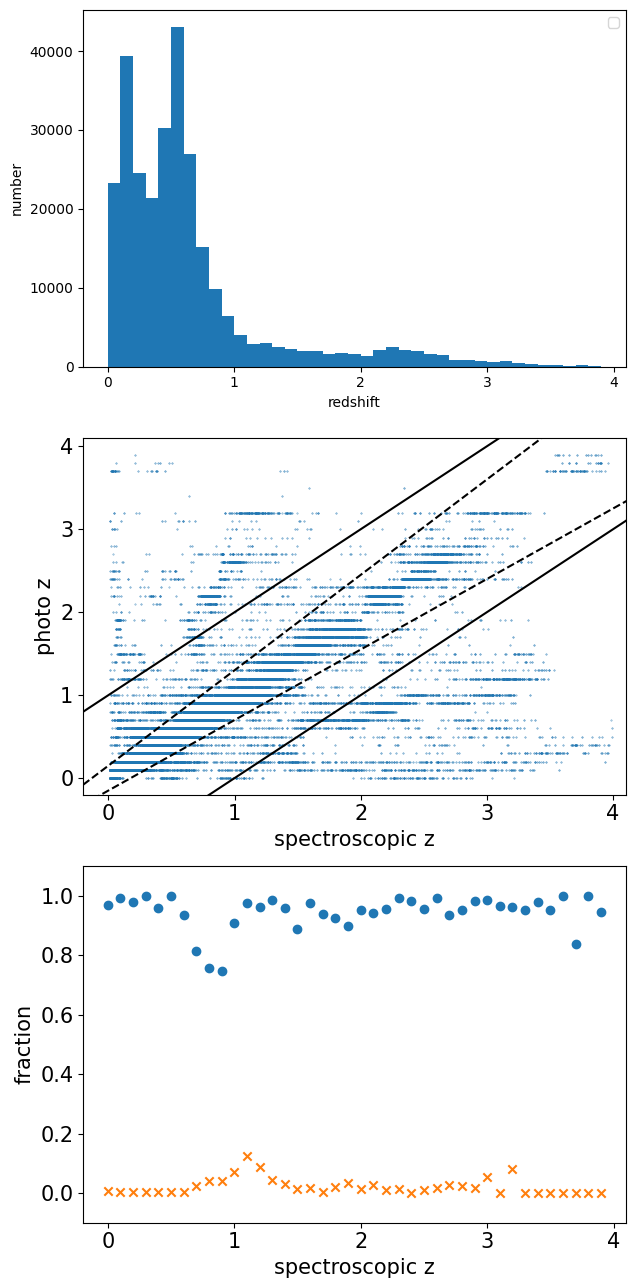

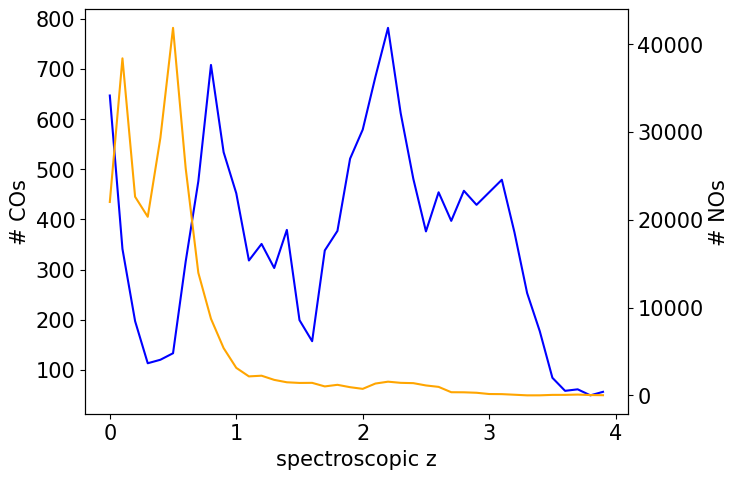

flagged nos > 2:	 1.4118%
flagged nos > 1:	 3.8793%
flagged nos:		 1.0453%
flagged COs:		 93.5416%
NOs:			 90.6169%
COs:			 5.0552%
Saved results to d:\data\유상현\data\2024-2025 Summer Research\github\PZ_CO_ID\PZ_CO_ID\results\results_model_CO_BC_hsc_SPIDERz_SPIDERz.csv


In [6]:
data = CO_BC_model.preprocess_data()
dl = CO_BC_model.build_dl(data)
results = CO_BC_model.evaluate_model(data, dl)
CO_BC_model.save_results(data, results)